In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/jhhalls/Online-Exam-Ds0124/main/Sales_LinReg.csv")

In [5]:
data.shape

(305, 6)

In [6]:
data.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,295.000000,300.000000,305.000000,297.000000,300.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,87.330161,14.781927,20.290023,21.411180,15.853789,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,74.050000,9.125000,15.900000,10.900000,10.000000,10.300000
50%,149.800000,21.050000,26.200000,23.500000,21.300000,12.800000
75%,221.450000,35.650000,39.600000,43.000000,36.900000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


In [7]:
#fill the null values
data['Republic']=data['Republic'].fillna(data['Republic'].mean())

data['NDTV']=data['NDTV'].fillna(data['NDTV'].mean())

data['TV9']=data['TV9'].fillna(data['TV9'].mean())

data['AajTak']=data['AajTak'].fillna(data['AajTak'].mean())

In [8]:
data.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,85.881799,14.659861,20.290023,21.127576,15.722872,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,75.100000,9.300000,15.900000,11.000000,10.100000,10.300000
50%,148.136610,21.300000,26.200000,24.200000,21.700000,12.800000
75%,220.300000,35.600000,39.600000,41.800000,36.800000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


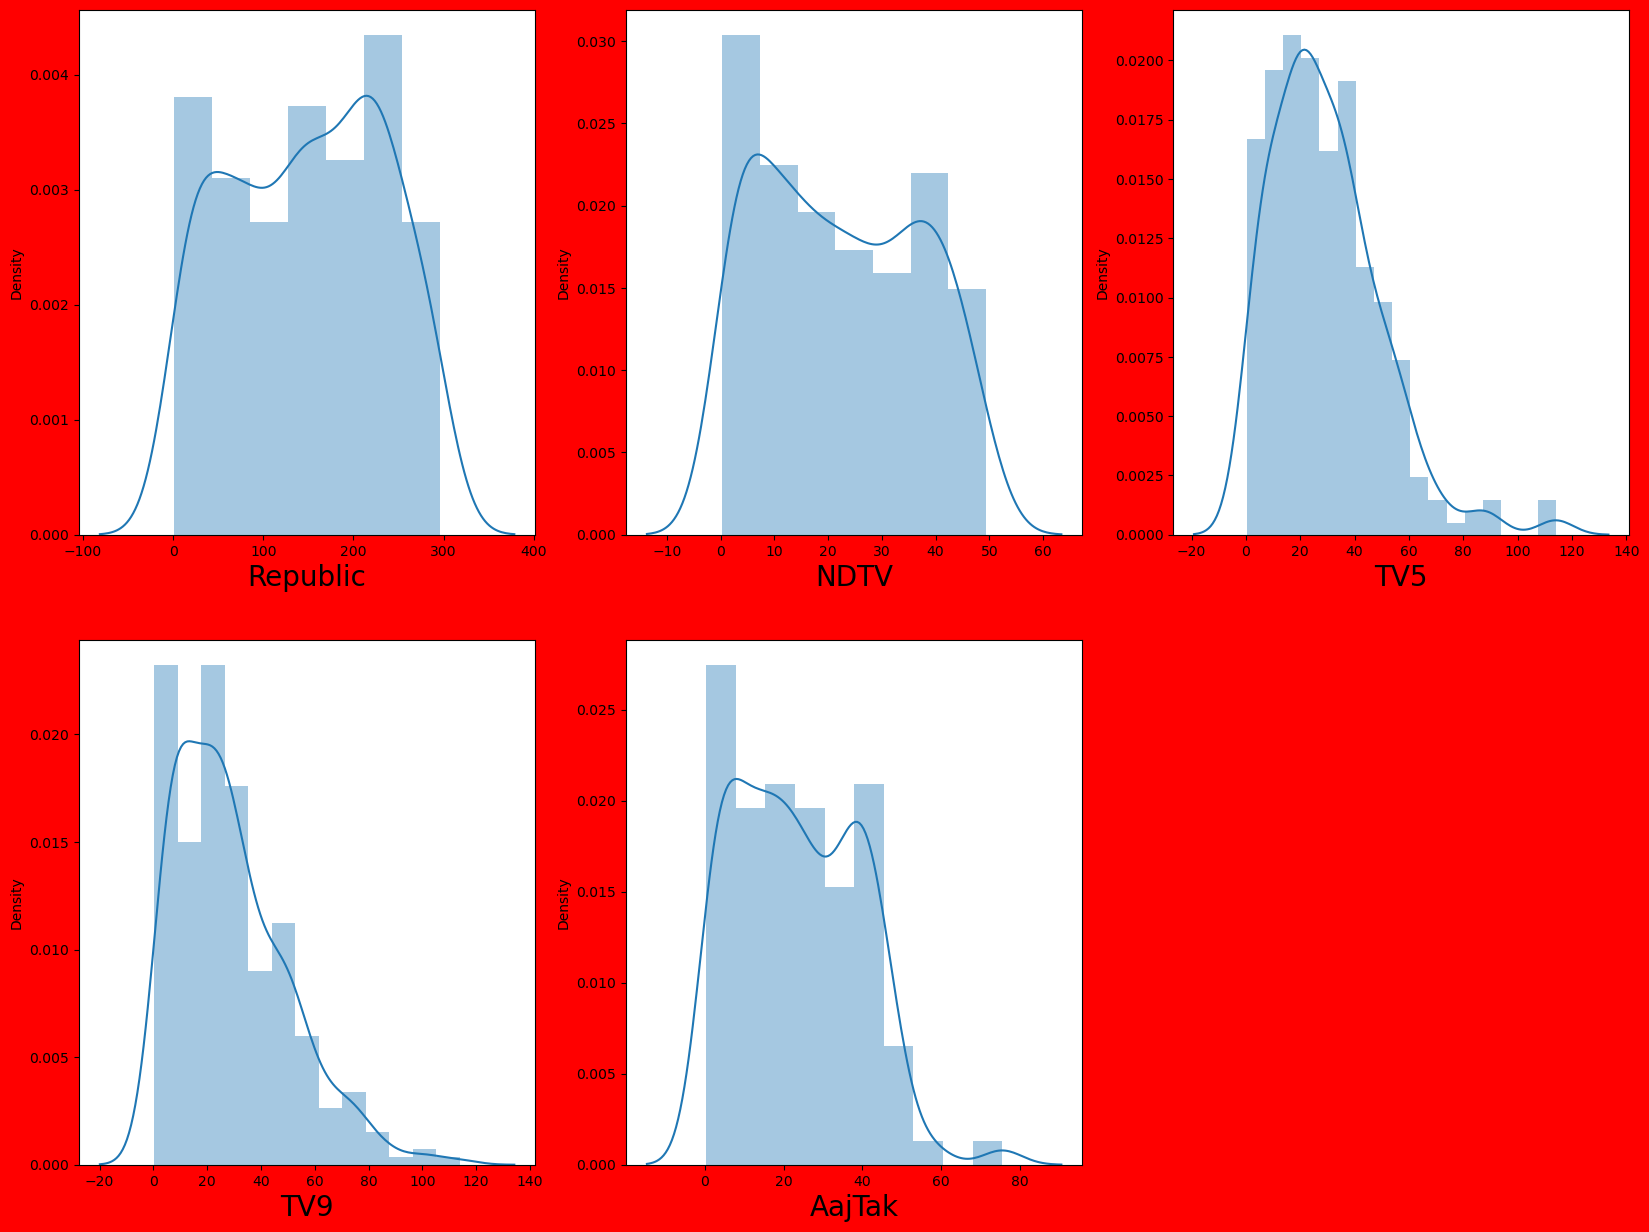

In [9]:
#data distribution through distplot

plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1

for column in data:
    if plotnumber<=5:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

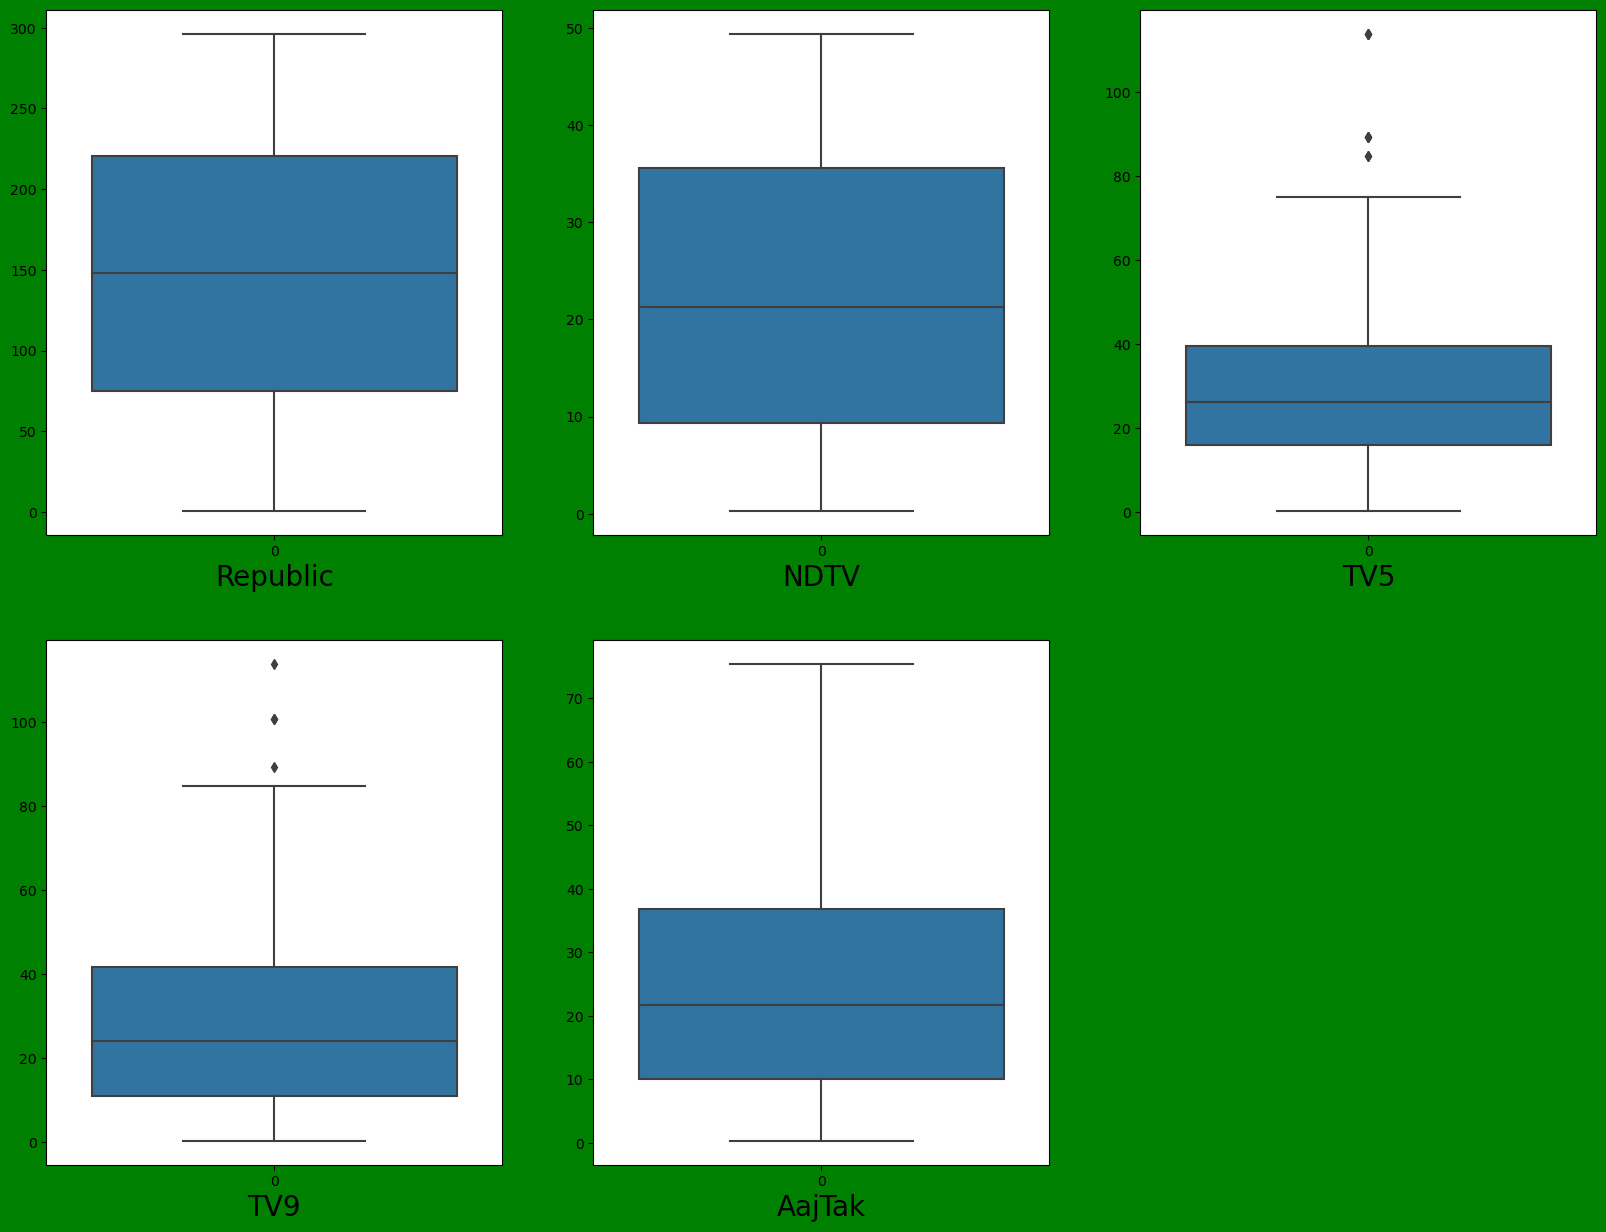

In [10]:
plt.figure(figsize=(20,15),facecolor='green')
plotnumber=1

for column in data:
    if plotnumber<=5:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [11]:
#Treating outliers

q1=data.quantile(0.25)
q3=data.quantile(0.75)
print(q1)
print(q3)

Republic    75.1
NDTV         9.3
TV5         15.9
TV9         11.0
AajTak      10.1
sales       10.3
Name: 0.25, dtype: float64
Republic    220.3
NDTV         35.6
TV5          39.6
TV9          41.8
AajTak       36.8
sales        17.2
Name: 0.75, dtype: float64


In [12]:
iqr=q3-q1
print(iqr)

Republic    145.2
NDTV         26.3
TV5          23.7
TV9          30.8
AajTak       26.7
sales         6.9
dtype: float64


In [13]:
tv5_high = (q3.TV5 + (1.5 * iqr.TV5))
tv9_high = (q3.TV9 + (1.5 * iqr.TV9))

print(tv5_high)
print(tv9_high)

75.15
88.0


In [14]:
del_index=np.where(data['TV5']>75.15)
print(del_index)

(array([  5,  55,  83, 142, 162, 193, 252, 272], dtype=int64),)


In [15]:
data=data.drop(data.index[del_index])

In [16]:
data.shape

(297, 6)

In [17]:
data=data.reset_index(drop=True)

In [18]:
data.head()

,Republic,NDTV,TV5,TV9,AajTak,sales
0,8.7,48.9,4.0,75.0,49.0,7.2
1,57.5,32.8,65.9,23.5,57.5,11.8
2,120.2,19.6,7.2,11.6,18.5,13.2
3,8.6,2.1,46.0,1.0,2.6,4.8
4,199.8,2.6,52.9,21.2,2.9,10.6


In [19]:
del_index1=np.where(data['TV9']>88.0)
print(del_index1)

(array([ 10,  59,  84, 191], dtype=int64),)


In [20]:
data=data.drop(data.index[del_index1])

In [21]:
data.shape

(293, 6)

In [ ]:
data.head()

In [22]:
#divide dataset into features and label:
y=data['sales']
X=data.drop(columns=['sales'])


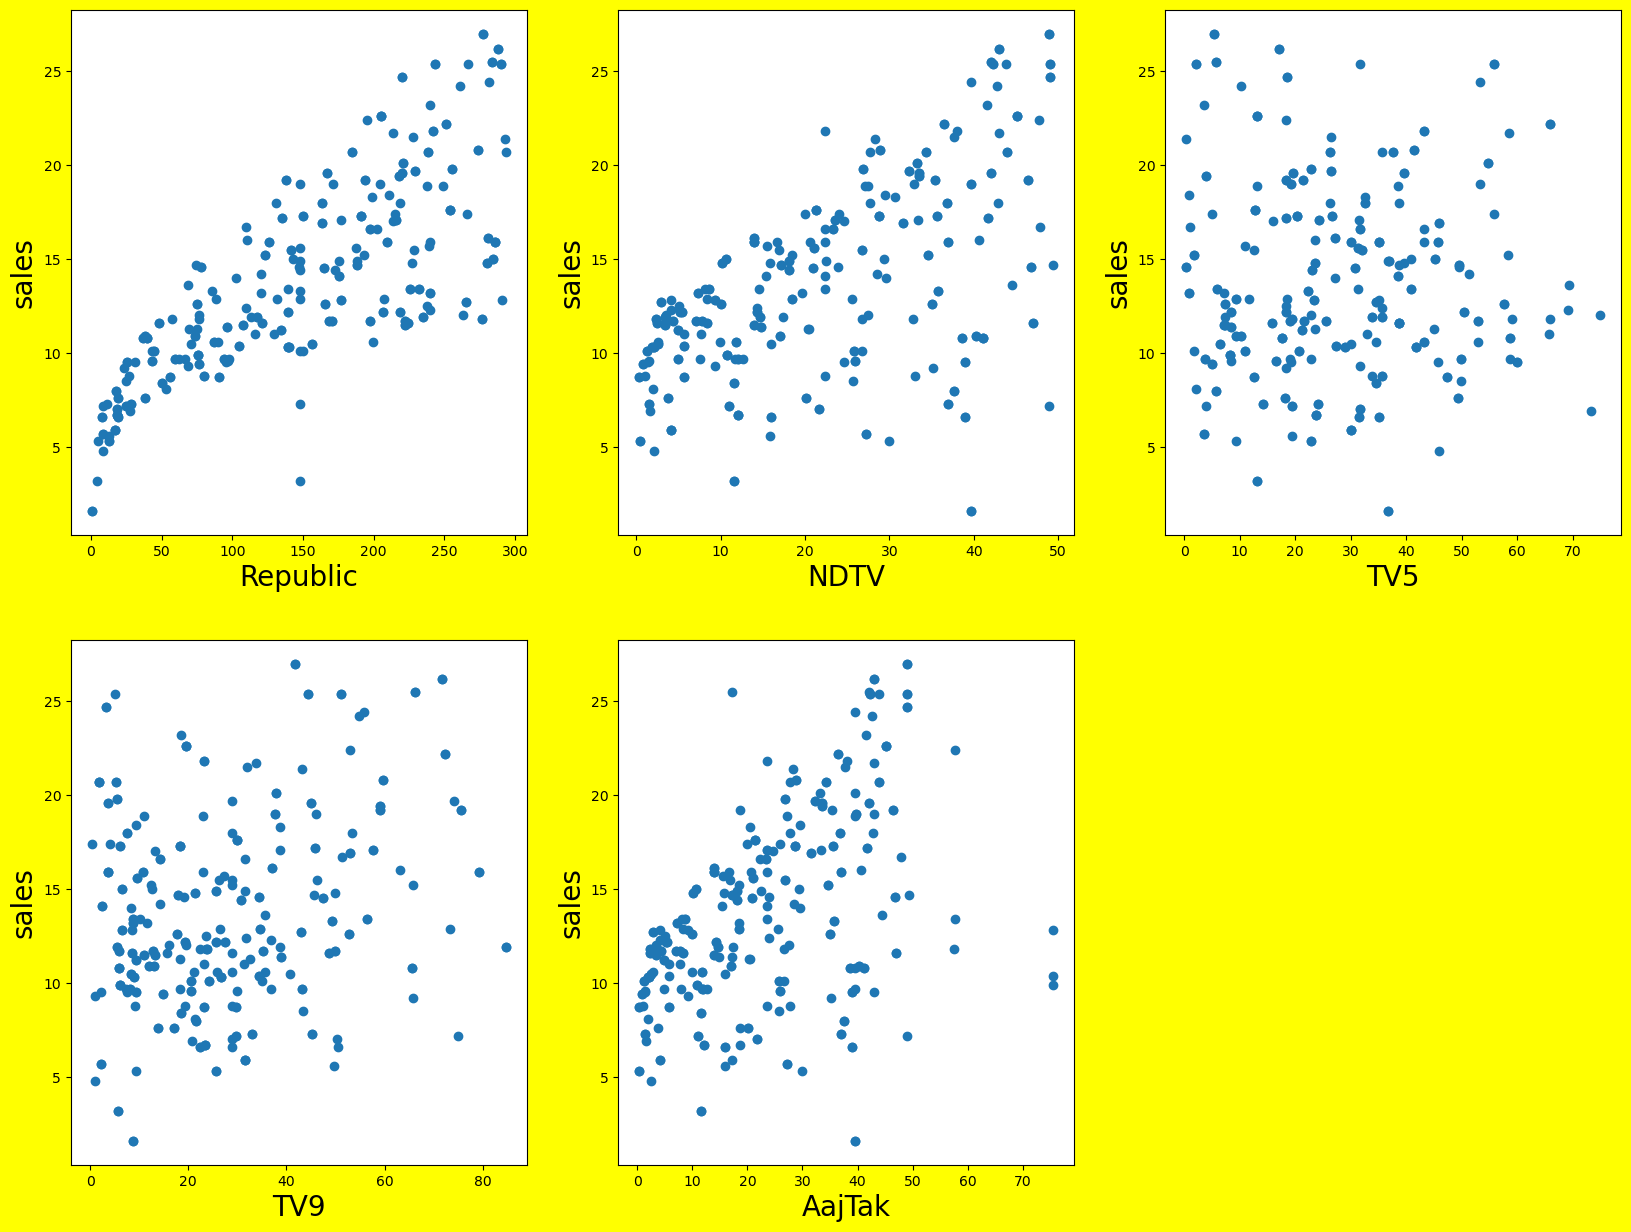

In [23]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=5:
        ax=plt.subplot(2,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('sales',fontsize=20)
        
    plotnumber+=1
plt.show()

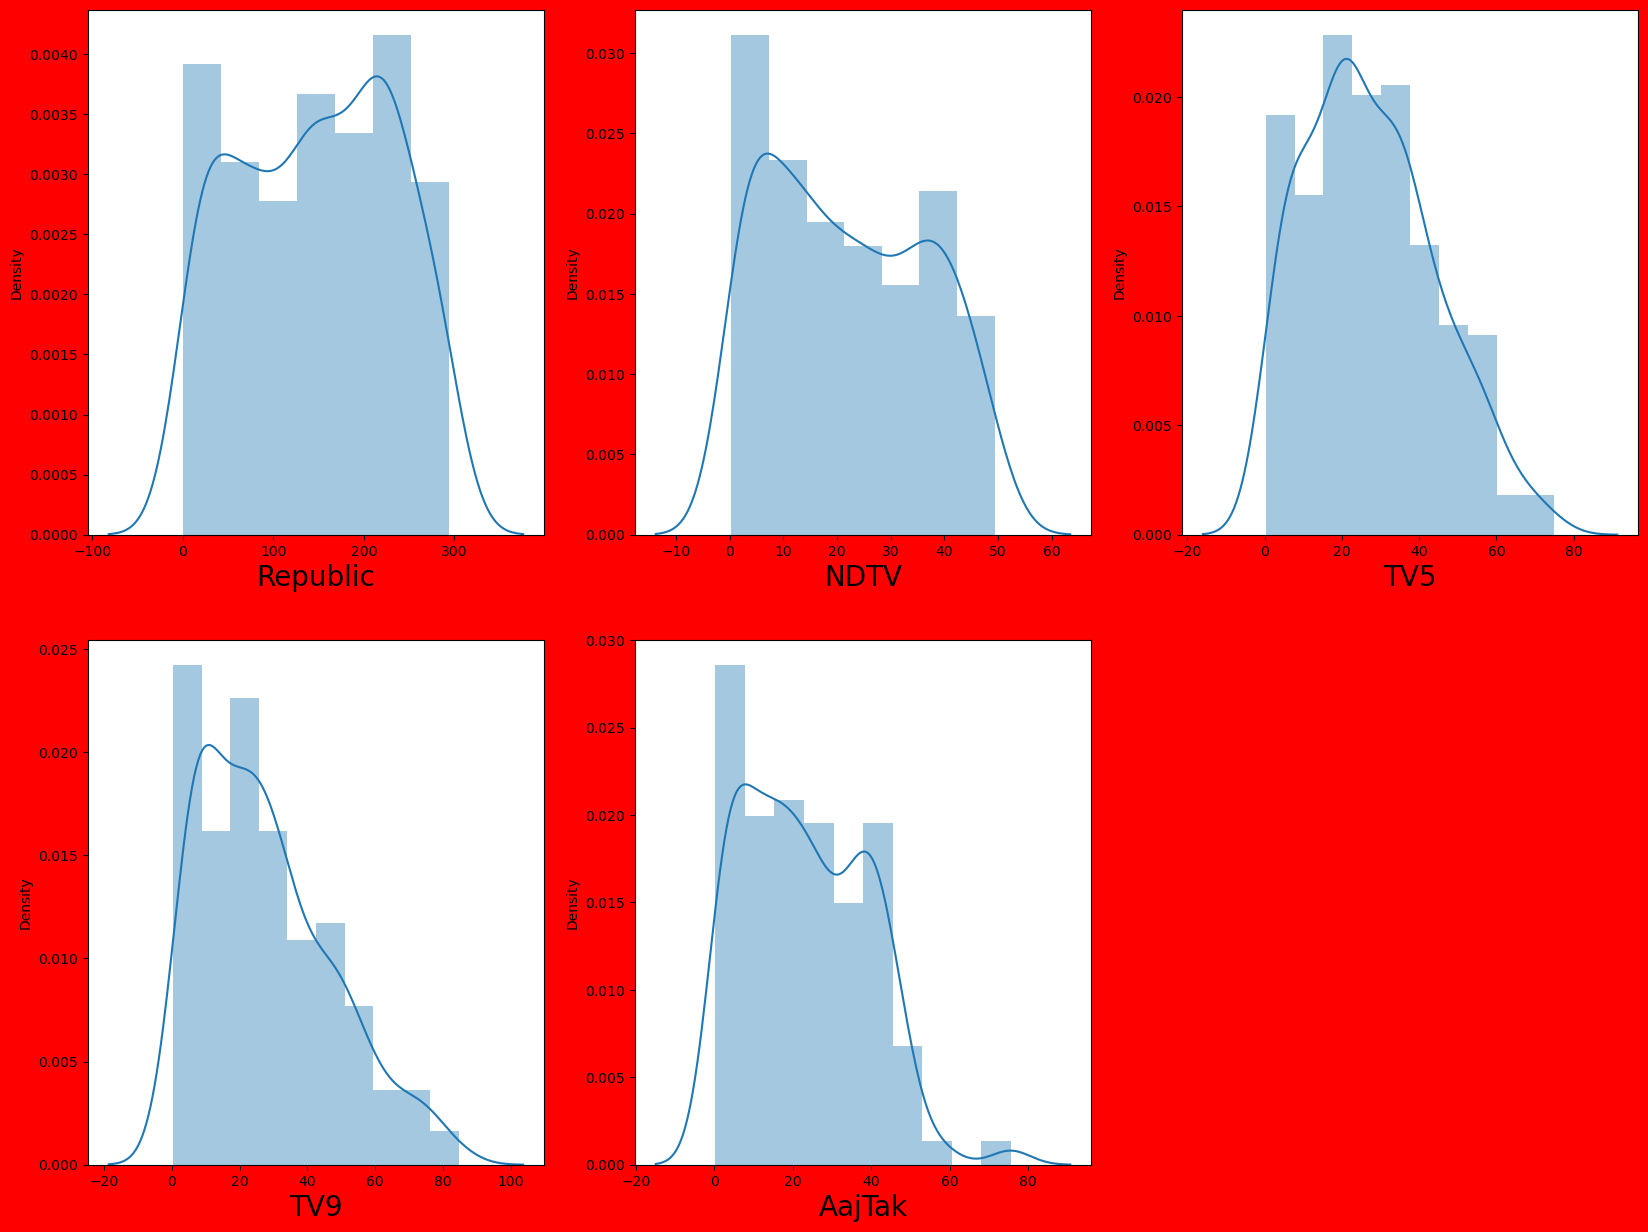

In [24]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1

for column in data:
    if plotnumber<=5:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

In [68]:
#model instantiating and training

regression=LinearRegression()
regression.fit(x_train,y_train)

print('intercept:',regression.intercept_)
print('Republic:',regression.coef_[0])
print('NDTV:',regression.coef_[1])
print('TV5:',regression.coef_[2])
print('TV9:',regression.coef_[3])
print('AajTak:',regression.coef_[4])

intercept: 13.723584668567288
Republic: 3.829334844296166
NDTV: 2.4882998859877636
TV5: -0.004384078243437903
TV9: 0.12195797621017443
AajTak: 0.37123717748634777


In [70]:
#As coefficient for TV5 is -0.004384 so it has no positive impact on sales. so column TV5 is removed.
y=data.sales
X=data.drop(columns=['sales','TV5'])
print(X)
print(y)

#data scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

     Republic  NDTV   TV9  AajTak
0         8.7  48.9  75.0    49.0
1        57.5  32.8  23.5    57.5
2       120.2  19.6  11.6    18.5
3         8.6   2.1   1.0     2.6
4       199.8   2.6  21.2     2.9
..        ...   ...   ...     ...
292     286.0  13.9   3.7    13.9
293      18.7  12.1  23.4    18.7
294      39.5  41.1   5.8    39.5
295      75.5  10.8   6.0    75.5
296      17.2   4.1  31.6    17.2

[293 rows x 4 columns]
0       7.2
1      11.8
2      13.2
3       4.8
4      10.6
       ... 
292    15.9
293     6.7
294    10.8
295     9.9
296     5.9
Name: sales, Length: 293, dtype: float64
[[-1.62103105  1.84783293  2.40176869  1.64131236]
 [-1.04962736  0.74522344 -0.22174578  2.18067631]
 [-0.3154673  -0.15877938 -0.82795592 -0.2940524 ]
 ...
 [-1.26039102  1.31364945 -1.12341969  1.03849383]
 [-0.83886371 -0.76144793 -1.11323128  3.32285879]
 [-1.52150377 -1.22029784  0.19088465 -0.37654335]]


In [71]:
#train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=348)
y_train.head()

48     14.0
78     11.5
116    19.6
25     11.9
204    14.6
Name: sales, dtype: float64

In [72]:
regression.fit(x_train,y_train)


LinearRegression()

In [73]:
#how well model fits the train data
regression.score(x_train,y_train)

0.8825378475497928

In [75]:
#how well model fits the test data
regression.score(x_test,y_test)

0.8083674662273894

In [76]:
y_pred=regression.predict(x_test)
print(y_pred)

[17.5160592   9.71770556 12.45358913  6.78515057 21.25074431  6.92826549
  3.49674656 10.81328594 16.92176825  9.05241071 15.67216648  7.94022698
 19.40780204 14.10879644 19.00531425  4.43548276  7.28153658  9.49990846
 13.15650686 20.92071818  7.90463653 13.07416896 10.44092622  6.48269935
  9.34209625  9.70292422  5.14287997 16.75331702 15.39236627 17.26564291
 18.21576578 17.18741409  8.83659148 14.90837843  7.27939297 24.35415254
  4.45087353 12.24836578 13.78708342 14.92770307 19.49046526 15.95771981
 15.95771981 16.14086435 20.73519669 17.5379718  14.80189272 13.01645702
 13.76592326 14.79012424 18.22270964  6.00398183 18.37036545 13.6870364
 15.88882616 10.18873769  9.51101031 12.45358913 12.1470062  15.24560603
 10.81328594 11.84703852  6.64177785 19.23479543 16.34996728 12.03534374
  7.89760517  6.78515057 10.88268959 19.68829973 13.78708342 12.98490384
  3.49674656 15.31162738]


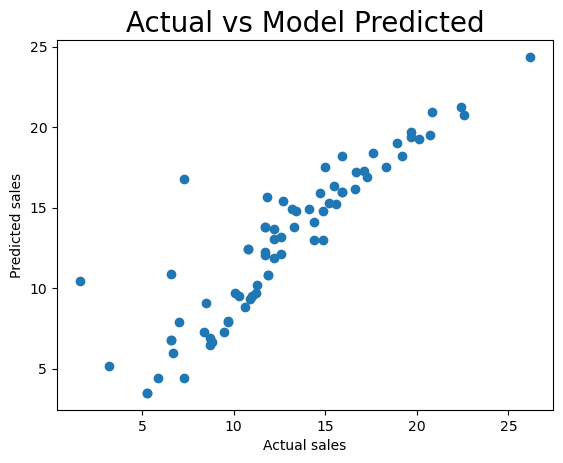

In [77]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual sales')
plt.ylabel('Predicted sales')
plt.title('Actual vs Model Predicted',fontsize=20)
plt.show()

In [78]:
#model evaluation

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [79]:
#MAE
mean_absolute_error(y_test,y_pred)


1.4116204696726549

In [80]:
#MSE
mean_squared_error(y_test,y_pred)


4.417106456819224

In [83]:
np.sqrt(mean_squared_error(y_test,y_pred)) 

2.101691332431864

In [82]:
data.shape

(293, 6)